In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TITLE_PAD = 30
TITLE_DIM = 30
XY_LABEL_PAD = 23
XY_LABEL_DIM = 21
XY_TICKS_DIM = 18
GRID_ALPHA = 0.2
FILL_ALPHA = 0.05
BAR_WIDTH = 0.95
LEGEND_LOC = "upper left"
LEGEND_LABEL_DIM = 15
COLOR_SCHEME = ["#1DB954", "#22577A", "#A03C78", "#C67ACE"]

FIG_SIZE = (18, 8)
FIG_BG_COLOR = None  # "w"
FIG_DPI = 500
FIG_BBOX = "tight"
FIG_PAD = .3
FIG_FORMATS = ["png", "pdf"]

In [258]:
def plotResults(title=None, x=[], yArr=[],
                xLabel=None, xTicks=None, xTicksPosition=None, xTicksRotation=0,
                yLim=None, yLabel=None, yTicks=None, yTicksPosition=None, yTicksRotation=0,
                legend=None, legendLocation=LEGEND_LOC,
                style="line", showGrid=False, gridAxis="both", fillPlot=False,
                figSize=FIG_SIZE, saveTitle=None):

    plt.figure(figsize=figSize, facecolor=FIG_BG_COLOR)

    maxY = None
    minY = None
    
    numPlots = len(yArr)
    for i, y in zip(range(numPlots), yArr):
        label = None
        try:
            label = legend[i]
        except:
            pass
        
        yNum = [float(yVal) for yVal in y]
        maxY = np.max(
                        [np.max(yNum), maxY]
                    ) if not maxY is None else np.max(yNum)
        minY = np.min(
                        [np.min(yNum), minY]
        ) if not minY is None else np.min(yNum)
        
        if style == "line":
            plt.plot(x, yNum, label=label, color=COLOR_SCHEME[i])

            if fillPlot:
                plt.fill_between(x, yNum, alpha=FILL_ALPHA,
                                 facecolor=COLOR_SCHEME[i])

        elif style == "bar":
            barWidth = BAR_WIDTH / numPlots
            xOffset = -BAR_WIDTH / 2 + barWidth / 2 + barWidth * i
            plt.bar(x + xOffset, yNum, width=barWidth,
                    label=label, align="center", color=COLOR_SCHEME[i])
        
        elif style == "polar":
            x = np.linspace(0, 2 * np.pi, len(yNum) + 1, endpoint=True)
            yNum.append(yNum[0])
            plt.polar(x, yNum, label=label, color=COLOR_SCHEME[i])

            if fillPlot:
                plt.fill(x, yNum, alpha=FILL_ALPHA,
                                 facecolor=COLOR_SCHEME[i])
        
        elif style == "boxplot":
            lineWidth = 1.5

            if fillPlot:
                plt.boxplot(yNum,
                            positions=[i],
                            notch=True,
                            widths=[1 / numPlots],
                            patch_artist=True,
                            showcaps=False,
                            showfliers=False,
                            showmeans=False,
                            boxprops=dict(
                                facecolor=COLOR_SCHEME[i],
                                alpha=FILL_ALPHA,
                            ),
                )
            
            plt.boxplot(yNum,
                        positions=[i],
                        notch=True,
                        widths=[1 / numPlots],
                        boxprops=dict(
                            color=COLOR_SCHEME[i],
                            linewidth=lineWidth,
                        ),
                        capprops=dict(
                            color=COLOR_SCHEME[i],
                            linewidth=lineWidth,
                        ),
                        whiskerprops=dict(
                            color=COLOR_SCHEME[i],
                            linewidth=lineWidth,
                        ),
                        flierprops=dict(
                            color=COLOR_SCHEME[i],
                            markeredgecolor=COLOR_SCHEME[i],
                            markerfacecolor=COLOR_SCHEME[i],
                        ),
                        medianprops=dict(
                            color=COLOR_SCHEME[i],
                            linewidth=lineWidth,
                        ),
            )
    
    if not xLabel is None:
        plt.xlabel(xLabel, labelpad=XY_LABEL_PAD, fontsize=XY_LABEL_DIM)

    if not yLabel is None:
        plt.ylabel(yLabel, labelpad=XY_LABEL_PAD, fontsize=XY_LABEL_DIM)

    if not xTicks is None:
        if not xTicksPosition:
            xTicksPosition = x if style != "boxplot" else np.arange(0, numPlots)
            
            if style == "polar":
                xTicks.append(xTicks[0])
            
        plt.xticks(xTicksPosition, xTicks, fontsize=XY_TICKS_DIM,
                   rotation=xTicksRotation)
    else:
        plt.xticks(fontsize=XY_TICKS_DIM, rotation=xTicksRotation)

    if not yTicks is None and not yTicksPosition is None:
        plt.yticks(yTicksPosition, yTicks, fontsize=XY_TICKS_DIM,
                   rotation=yTicksRotation)
    elif not yTicksPosition is None:
        plt.yticks(yTicksPosition, fontsize=XY_TICKS_DIM,
                   rotation=yTicksRotation)
    else:
        plt.yticks(fontsize=XY_TICKS_DIM, rotation=yTicksRotation)
    
    if yLim is None:
        yPad = (maxY - minY) * 0.1
        topLim = maxY + yPad * 2
        infLim = minY - yPad if style == "bar" else minY - yPad
        infLim = 0 if style == "bar" and minY >= 0 and minY <= yPad else infLim
        infLim = minY if style == "polar" else infLim
        plt.ylim(top=topLim, bottom=infLim)
    else:
        plt.ylim(top=yLim[1], bottom=yLim[0])

    if showGrid:
        plt.grid(alpha=GRID_ALPHA, axis=gridAxis)

    if not legend is None:
        plt.legend(loc=legendLocation, fontsize=LEGEND_LABEL_DIM)
    
    if not saveTitle is None:
        baseDir = "plots"
        if not os.path.exists(baseDir):
            os.mkdir("plots")

        for figFormat in FIG_FORMATS:
            saveDir = baseDir + "/" + figFormat
            if not os.path.exists(saveDir):
                os.mkdir(saveDir)

            plt.savefig(saveDir + "/" + saveTitle + "." + figFormat,
                        facecolor=FIG_BG_COLOR,
                        dpi=FIG_DPI,
                        bbox_inches=FIG_BBOX,
                        pad_inches=FIG_PAD)

    if not title is None:
        plt.title(title, fontsize=TITLE_DIM, pad=TITLE_PAD)

    plt.show()


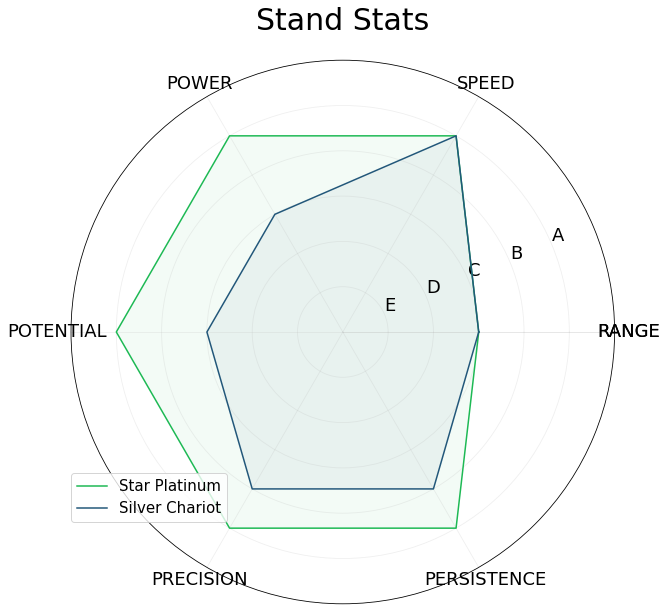

In [114]:
plotResults(
    title="Stand Stats",
    yArr=[[3, 5, 5, 5, 5, 5], [3, 5, 3, 3, 4, 4]],
    xTicks=["RANGE", "SPEED", "POWER",
            "POTENTIAL", "PRECISION", "PERSISTENCE"],
    yLim=[0, 6],
    yTicksPosition=np.arange(0, 6),
    yTicks=["", "E", "D", "C", "B", "A"],
    legend=["Star Platinum", "Silver Chariot"],
    style="polar",
    showGrid=True,
    fillPlot=True,
    legendLocation=[0, 0.15],
    figSize=(10, 10),
)

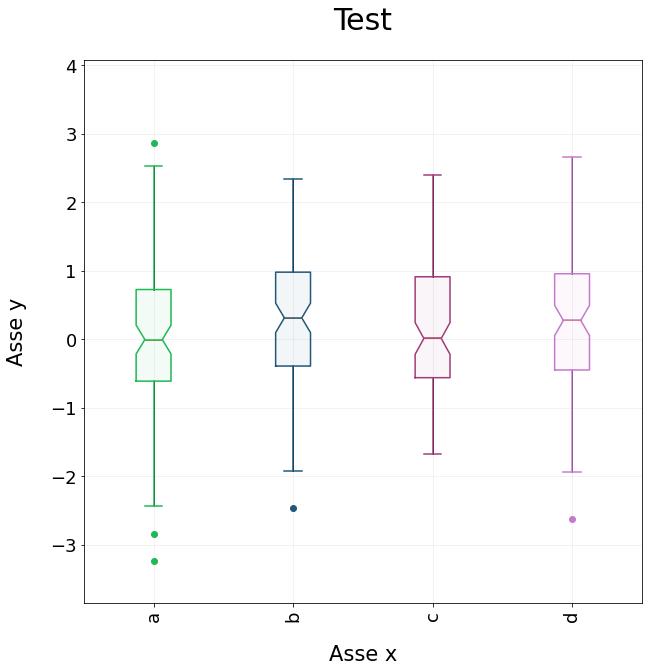

In [265]:
plotResults(
    title="Test",
    yArr=list(np.random.normal(0.1, size=(4, 100))),
    style="boxplot",
    fillPlot=True,
    figSize=(10, 10),
    xLabel="Asse x",
    yLabel="Asse y",
    showGrid=True,
    xTicksPosition=range(0, 4),
    xTicks=["a", "b", "c", "d"],
    xTicksRotation=90
)
